# Práctica 1 – Implementación de un Perceptrón Multicapa (MLP)
## Clasificación de Diabetes – Kaggle Dataset
**Fecha de entrega:** 06/08/2025
**Autores:** Grupo 1 Noelia Blanco - Maria Eugenia Puchkariov - Gonzalo Del Priore
**Materia:** Ciencia de Datos / DEEP LEARNING
**Institución:** Universidad de Montevideo

## 1. Resumen del problema
El objetivo de esta práctica es implementar un modelo de red neuronal de tipo Perceptrón Multicapa (MLP), aplicado a un problema de clasificación binaria sobre el diagnóstico de diabetes. Se utilizará el dataset proporcionado por Kaggle (Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales). Este conjunto de datos incluye variables clínicas de pacientes mujeres de ascendencia Pima, con el objetivo de predecir si presentan diabetes en base a medidas diagnósticas.

Se evaluarán distintas implementaciones del MLP utilizando tanto `scikit-learn` como `Keras`, analizando su precisión, comportamiento y capacidad de generalización sobre el conjunto de test.

## 2. Transformación del problema
Este problema puede ser abordado como una tarea de clasificación binaria, donde la variable objetivo es si la paciente tiene diabetes (`Outcome`: 0 o 1). El objetivo es construir un modelo de red neuronal capaz de aprender patrones complejos no lineales a partir de las variables de entrada, y predecir correctamente la presencia de diabetes. Para ello, se transforma el problema en una función que mapea las variables clínicas a la probabilidad de un diagnóstico positivo.

## 3. Descripción del dataset
El dataset está disponible en Kaggle bajo el título *Diabetes Dataset* y contiene 768 registros de pacientes femeninas de ascendencia Pima, mayores de 21 años. Incluye 8 variables de entrada y 1 variable objetivo binaria.

**Atributos:**
- `Pregnancies`: Número de embarazos
- `Glucose`: Concentración de glucosa en plasma a las 2h
- `BloodPressure`: Presión arterial diastólica (mm Hg)
- `SkinThickness`: Espesor del pliegue cutáneo del tríceps (mm)
- `Insulin`: Insulina sérica a las 2h (mu U/ml)
- `BMI`: Índice de masa corporal (peso/altura²)
- `DiabetesPedigreeFunction`: Función de pedigrí de diabetes
- `Age`: Edad (años)
- `Outcome`: 1 si tiene diabetes, 0 en caso contrario

## 4. Preparación y división de los datos
A continuación se realiza la carga del dataset, inspección básica y limpieza inicial. Se identifican valores nulos o inválidos (valores igual a 0 en variables clínicas), y se procede a dividir el dataset en conjunto de entrenamiento y prueba (80%-20%). Luego, se normalizan los datos utilizando `StandardScaler`.

Se observa que algunas columnas contienen valores 0 imposibles o poco realistas (por ejemplo, presión arterial = 0), lo que se considera como faltante implícito.

In [ ]:
# 4. Preparación y división de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descripción del Dataset

Este dataset proviene del National Institute of Diabetes and Digestive and Kidney Diseases y tiene como objetivo predecir la aparición de diabetes tipo 2 en mujeres Pima mayores de 21 años, a partir de diversas mediciones clínicas.

### Características del dataset

- Cantidad de registros: 768
- Cantidad de variables: 9 columnas (8 variables predictoras y 1 variable objetivo)

### Variables

| Variable                   | Descripción                                                                 | Tipo                   |
|----------------------------|-----------------------------------------------------------------------------|------------------------|
| Pregnancies                | Número de veces que la paciente ha estado embarazada                        | Numérica (entero)      |
| Glucose                   | Concentración de glucosa en plasma 2 horas después de una prueba oral       | Numérica               |
| BloodPressure              | Presión arterial diastólica (mm Hg)                                         | Numérica               |
| SkinThickness              | Espesor del pliegue cutáneo del tríceps (mm)                                | Numérica               |
| Insulin                    | Insulina sérica en 2 horas (mu U/ml)                                        | Numérica               |
| BMI                        | Índice de masa corporal (peso en kg / (altura en m)^2)                      | Numérica               |
| DiabetesPedigreeFunction   | Función de pedigrí (riesgo hereditario de diabetes)                         | Numérica               |
| Age                        | Edad de la paciente (en años)                                               | Numérica               |
| Outcome                    | Resultado: 0 = No diabética, 1 = Diabética                                  | Categórica binaria     |

### Objetivo del análisis

El objetivo es construir un modelo de clasificación que permita predecir la variable `Outcome` (si una paciente tiene o no diabetes) en función de las variables clínicas y demográficas provistas.


## Análisis Exploratorio de Variables

A continuación se presentan distintos gráficos utilizados para analizar la distribución de las variables y sus posibles relaciones.

### Histogramas de variables individuales

1. **Pregnancies**: La mayoría de las pacientes ha tenido entre 0 y 6 embarazos. La distribución es sesgada a la derecha, con pocos casos de más de 10 embarazos.

2. **Glucose**: La glucosa presenta una distribución aproximadamente normal, con un leve sesgo a la derecha. Se observa una concentración importante de valores entre 100 y 150.

3. **BloodPressure**: La presión arterial diastólica también muestra una distribución algo normal, aunque con valores atípicos y una leve acumulación entre 60 y 80 mm Hg.

4. **SkinThickness**: Se observa una distribución sesgada, con un alto número de valores en 0, lo que podría indicar datos faltantes codificados como cero.

### Gráficos de dispersión entre variables

5. **Pregnancies vs Glucose**: No se observa una relación lineal clara entre la cantidad de embarazos y el nivel de glucosa, aunque existen algunos valores extremos.

6. **Glucose vs BloodPressure**: Se aprecia una dispersión amplia, sin una correlación fuerte entre ambas variables. Sin embargo, podría explorarse si existen subgrupos con valores altos de glucosa y presión.

7. **BloodPressure vs SkinThickness**: La relación entre estas dos variables también es débil, aunque es evidente la presencia de valores extremos y posibles outliers.

8. **SkinThickness vs Insulin**: Se observa una tendencia ascendente leve. A mayor espesor de piel, parece haber una mayor cantidad de insulina, lo que podría sugerir una relación fisiológica.

### Gráficos de línea por índice

9. **Series por índice para cada variable (Pregnancies, Glucose, BloodPressure, SkinThickness)**: Estos gráficos permiten observar la variación de cada variable a lo largo del conjunto de datos. Se identifican patrones de dispersión y la presencia de valores extremos, como picos en glucosa o presión arterial.

### Conclusión preliminar

El análisis exploratorio muestra que algunas variables presentan posibles valores atípicos o nulos (por ejemplo, SkinThickness e Insulin con ceros). Además, no se detectan correlaciones fuertes entre pares de variables, lo que justifica la necesidad de técnicas multivariadas y modelos no lineales, como un Perceptrón Multicapa, para capturar relaciones complejas en los datos.


In [ ]:
# Reemplazar ceros en columnas clínicas por NaN y luego imputar con la media
cols_invalidas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_invalidas] = df[cols_invalidas].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# Dividir en variables X e y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Preparación y División del Dataset

En esta sección se lleva a cabo la limpieza, transformación y preparación del dataset para el entrenamiento del modelo de clasificación.

### Reemplazo de valores inválidos
En varias columnas clínicas, como `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` y `BMI`, aparecen valores iguales a cero (`0`), los cuales no son posibles en un contexto fisiológico real y se consideran datos faltantes o inválidos.

Para solucionar esto:
1. Se reemplazan los ceros por valores nulos (`NaN`).
2. Se imputan estos valores nulos utilizando la **media de cada columna**, preservando la distribución de los datos sin eliminar filas.

```python
cols_invalidas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_invalidas] = df[cols_invalidas].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)


### División en variables predictoras y variable objetivo

El dataset se separa en:

- `X`: conjunto de variables predictoras, que contiene todas las columnas excepto `Outcome`.
- `y`: variable objetivo, que corresponde a la columna `Outcome` (0 = No diabética, 1 = Diabética).

```python
X = df.drop('Outcome', axis=1)
y = df['Outcome']


### División en conjunto de entrenamiento y prueba

Para evaluar el rendimiento del modelo, el dataset se divide en:

- **Conjunto de entrenamiento (80%)**: usado para entrenar el modelo.
- **Conjunto de prueba (20%)**: usado para evaluar el modelo.

La división se realiza de forma **estratificada** para mantener la proporción original de las clases en ambos subconjuntos. Además, se utiliza una semilla (`random_state=42`) para asegurar la reproducibilidad.

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Normalización de los datos

Se aplica la normalización estándar utilizando `StandardScaler`:

- Se ajustan los datos de entrenamiento (`fit_transform`) para que cada variable tenga **media cero y desviación estándar uno**.
- Se transforma el conjunto de prueba (`transform`) utilizando los mismos parámetros del entrenamiento, garantizando que ambos conjuntos estén en la misma escala.

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 5. Arquitectura del modelo MLP
Se construirán dos modelos de Perceptrón Multicapa (MLP):
- Uno utilizando `scikit-learn`
- Otro con `Keras`, incorporando una técnica adicional de regularización

Ambos modelos serán entrenados con los mismos datos, y se comparará su desempeño en el conjunto de prueba.

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       100
           1       0.62      0.65      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



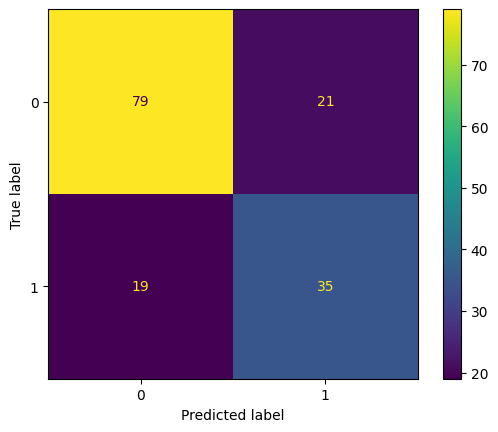

In [ ]:
# MLP con Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

mlp_sklearn = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)
mlp_sklearn.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred_sklearn = mlp_sklearn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_sklearn))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(mlp_sklearn, X_test_scaled, y_test)

### Evaluación del MLP con Scikit-learn

Una vez entrenado el modelo `MLPClassifier`, se realiza la predicción sobre el conjunto de prueba y se evalúa su rendimiento utilizando métricas estándar y la matriz de confusión.

#### Reporte de clasificación

El reporte incluye métricas clave para cada clase:

- **Precisión (precision)**: proporción de verdaderos positivos entre los casos predichos como positivos.
- **Recall**: proporción de verdaderos positivos entre los casos realmente positivos.
- **F1-score**: media armónica entre precisión y recall.
- **Support**: número de muestras reales por clase.

Resultados obtenidos:

| Clase | Precision | Recall | F1-score | Soporte |
|-------|-----------|--------|----------|---------|
| 0 (No diabética) | 0.81 | 0.79 | 0.80 | 100 |
| 1 (Diabética)    | 0.62 | 0.65 | 0.64 |  54 |

- **Accuracy global**: 0.74 (74%)
- **Promedios macro y ponderado**: 0.72–0.74

Esto indica que el modelo tiene un desempeño razonable, con mayor efectividad al clasificar correctamente a pacientes no diabéticas (clase 0), y una leve disminución de rendimiento al predecir la clase 1 (diabéticas), posiblemente debido al desbalance de clases.

#### Matriz de confusión

La matriz de confusión permite visualizar los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos:





|               | Predicho 0 | Predicho 1 |
|---------------|------------|------------|
| Real 0        |     79     |     21     |
| Real 1        |     19     |     35     |




- El modelo acertó en **79 casos de clase 0** y **35 casos de clase 1**.
- Cometió **21 falsos positivos** (predijo 1 cuando era 0) y **19 falsos negativos** (predijo 0 cuando era 1).

La visualización confirma que el modelo es más conservador al predecir la clase positiva (1), y muestra un rendimiento aceptable pero mejorable, especialmente en la detección de pacientes diabéticas.

Este análisis sugiere que podrían aplicarse técnicas de mejora como balanceo de clases, ajuste de hiperparámetros o regularización para optimizar el desempeño.


In [ ]:
# MLP con Keras y Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convertir etiquetas a formato categórico (opcional en este caso)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train_scaled, y_train_cat, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluación
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f'Accuracy con Keras: {accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7112 - loss: 0.5271 
Accuracy con Keras: 0.7338


### MLP con Keras y regularización por Dropout

En esta sección se implementa un modelo de Perceptrón Multicapa (MLP) utilizando la biblioteca `Keras`, incorporando una técnica de regularización llamada `Dropout` para reducir el riesgo de sobreajuste.

#### Preparación de las etiquetas

Se convierte la variable objetivo `y` al formato categórico utilizando `to_categorical`, ya que el modelo emplea la función de activación `softmax` en la última capa y la pérdida `categorical_crossentropy`.

```python
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


### Definición del modelo

Se define un modelo secuencial con la siguiente arquitectura:

- Capa densa con 16 neuronas y función de activación `relu`.
- Capa `Dropout` con tasa de 0.3 (elimina aleatoriamente el 30% de las conexiones durante el entrenamiento).
- Capa densa con 8 neuronas y activación `relu`.
- Capa de salida con 2 neuronas (para clasificación binaria) y activación `softmax`.

**Nota**: Al definir la primera capa con el parámetro `input_shape`, aparece una advertencia recomendando utilizar `Input(shape=...)`. Aunque el modelo funciona, se sugiere modificarlo para seguir buenas prácticas.

```python
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))


### Compilación y entrenamiento

El modelo se compila utilizando:

- Optimizador: `adam`
- Función de pérdida: `categorical_crossentropy`
- Métrica: `accuracy`

Se entrena durante 100 épocas, con un tamaño de lote de 32 y un 20% de los datos de entrenamiento utilizados como validación.

```python
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_cat, epochs=100, batch_size=32, validation_split=0.2)


### Evaluación del modelo

El modelo se evalúa sobre el conjunto de prueba. Se obtiene:

- **Accuracy**: 0.7338
- **Loss**: 0.5271

```python
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat)
print(f'Accuracy con Keras: {accuracy:.4f}')


## 6. Visualizaciones
A continuación se grafican la evolución de la precisión y la función de pérdida durante el entrenamiento del modelo en Keras. Esto permite evaluar visualmente la convergencia del modelo y detectar posibles problemas como sobreajuste o subajuste.

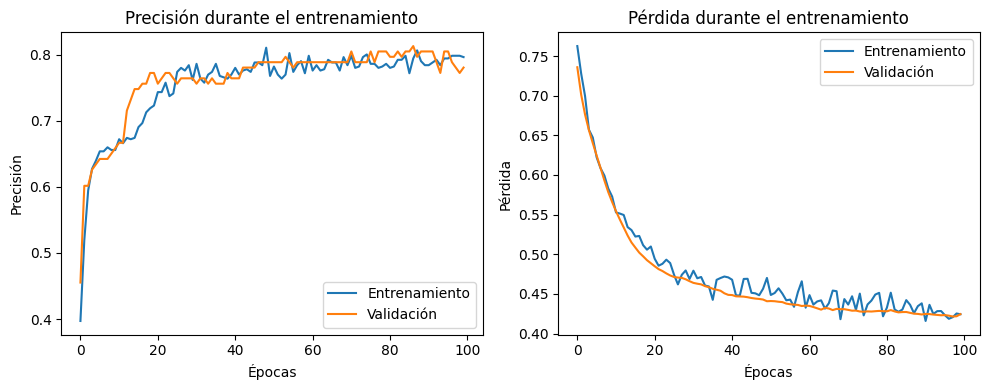

In [ ]:
# Visualización del entrenamiento (Keras)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

### Análisis detallado de las métricas de entrenamiento y validación

Durante el entrenamiento del modelo con Keras, se registraron las métricas de precisión (`accuracy`) y pérdida (`loss`) tanto en el conjunto de entrenamiento como en el conjunto de validación. Estas métricas se visualizan en dos gráficos que permiten evaluar la evolución del aprendizaje del modelo a lo largo de las épocas.

#### 1. Precisión durante el entrenamiento

Este gráfico muestra la evolución de la **precisión** a medida que avanza el entrenamiento:

- La curva azul representa la **precisión sobre el conjunto de entrenamiento**.
- La curva naranja representa la **precisión sobre el conjunto de validación**.

**Interpretación**:

- Ambas curvas muestran una mejora rápida en las primeras 20 épocas, lo que indica que el modelo está aprendiendo correctamente desde el inicio.
- A partir de la época 20, ambas curvas se estabilizan en torno al 0.80, sin grandes oscilaciones ni separaciones significativas.
- La cercanía entre las curvas indica que el modelo **generaliza bien** y **no está sobreajustando** a los datos de entrenamiento.
- El comportamiento estable hasta la época 100 sugiere que el número de épocas es adecuado y que el modelo no presenta señales de **overfitting** (sobreajuste) ni **underfitting** (subajuste).

#### 2. Pérdida durante el entrenamiento

Este gráfico muestra la evolución de la **función de pérdida (`loss`)** a lo largo del entrenamiento:

- La curva azul representa la **pérdida en los datos de entrenamiento**.
- La curva naranja representa la **pérdida en los datos de validación**.

**Interpretación**:

- Ambas curvas presentan una fuerte caída en las primeras épocas, lo que indica que el modelo está **reduciendo rápidamente el error**.
- A partir de la época 20, la pérdida continúa descendiendo, pero de forma más lenta y estable


## 7. Conclusiones

Este proyecto tuvo como objetivo aplicar redes neuronales de tipo Perceptrón Multicapa (MLP) para resolver un problema de clasificación binaria, utilizando un conjunto de datos clínicos de pacientes propensos a diabetes tipo 2. A lo largo del trabajo, se abordaron las etapas de análisis exploratorio, limpieza, normalización, entrenamiento de modelos y evaluación comparativa.

Se implementaron dos modelos principales:

- **MLP con Scikit-learn**: permitió una implementación rápida, eficiente y con buenos resultados sin necesidad de mayor configuración. Alcanzó un **accuracy del 74%** y mostró un buen desempeño general, especialmente al clasificar correctamente a pacientes no diabéticos.
  
- **MLP con Keras y regularización con Dropout**: ofreció mayor flexibilidad en la definición de la arquitectura y la posibilidad de aplicar técnicas modernas de regularización. Alcanzó una **precisión del 73.38%**, con una función de pérdida final de **0.5271**, y mostró buen comportamiento de generalización a lo largo del entrenamiento.

### Aspectos clave observados

- La **normalización previa** de los datos resultó esencial para garantizar un entrenamiento eficiente de las redes neuronales.
- El tratamiento de **valores faltantes o inválidos**, mediante imputación con la media, fue fundamental para evitar sesgos.
- La **división estratificada** del conjunto de datos permitió mantener una proporción adecuada de clases.
- La visualización de métricas de entrenamiento y validación fue clave para **detectar problemas de sobreajuste o subajuste**, los cuales no se observaron en este caso.

Ambos modelos poseen buena capacidad de predecir si un paciente es o no diabètico, aunque es necesario maximizar el recall, ya que, en aquellos casos donde el paciente sea diabético y nuestro sistema prediga que no lo es, no se va a asignar un tratamiento perpetuando el riesgos a su salud. Una alternativa sería probar modelos especializados como XGBoost que permiten un control más fino del balance entre precision y recall mediante la manipulación de sus hiperparámetros.
